In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Read in the data. (1)
chinese = pd.read_csv('chineseMNIST.csv')
chinese

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


<ipython-input-29-1a346a7b3cc3>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(chinese['label'].unique(), rotation=90)


[Text(0, 0, '9'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '1000'),
 Text(4, 0, '10000'),
 Text(5, 0, '100000000'),
 Text(6, 0, '0'),
 Text(7, 0, '1'),
 Text(8, 0, '2'),
 Text(9, 0, '3'),
 Text(10, 0, '4'),
 Text(11, 0, '5'),
 Text(12, 0, '6'),
 Text(13, 0, '7'),
 Text(14, 0, '8')]

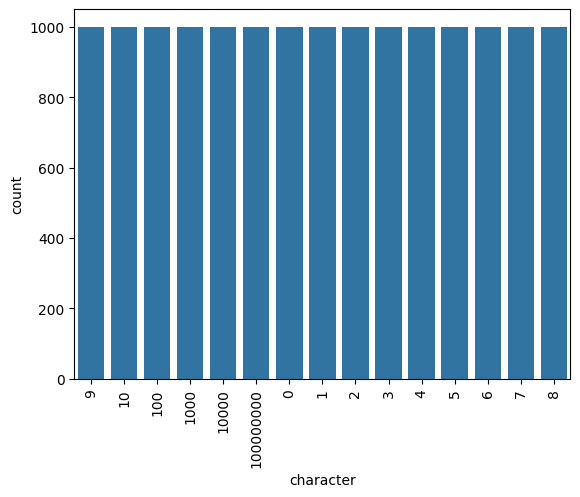

In [ ]:
#Plot the count (histogram) of each Chinese number. (1)
ax = sb.countplot(x='character', data=chinese)
ax.set_xticklabels(chinese['label'].unique(), rotation=90)

In [ ]:
from matplotlib.font_manager import FontProperties

font_path = 'SimHei.ttf'
chinese_font = FontProperties(fname=font_path)

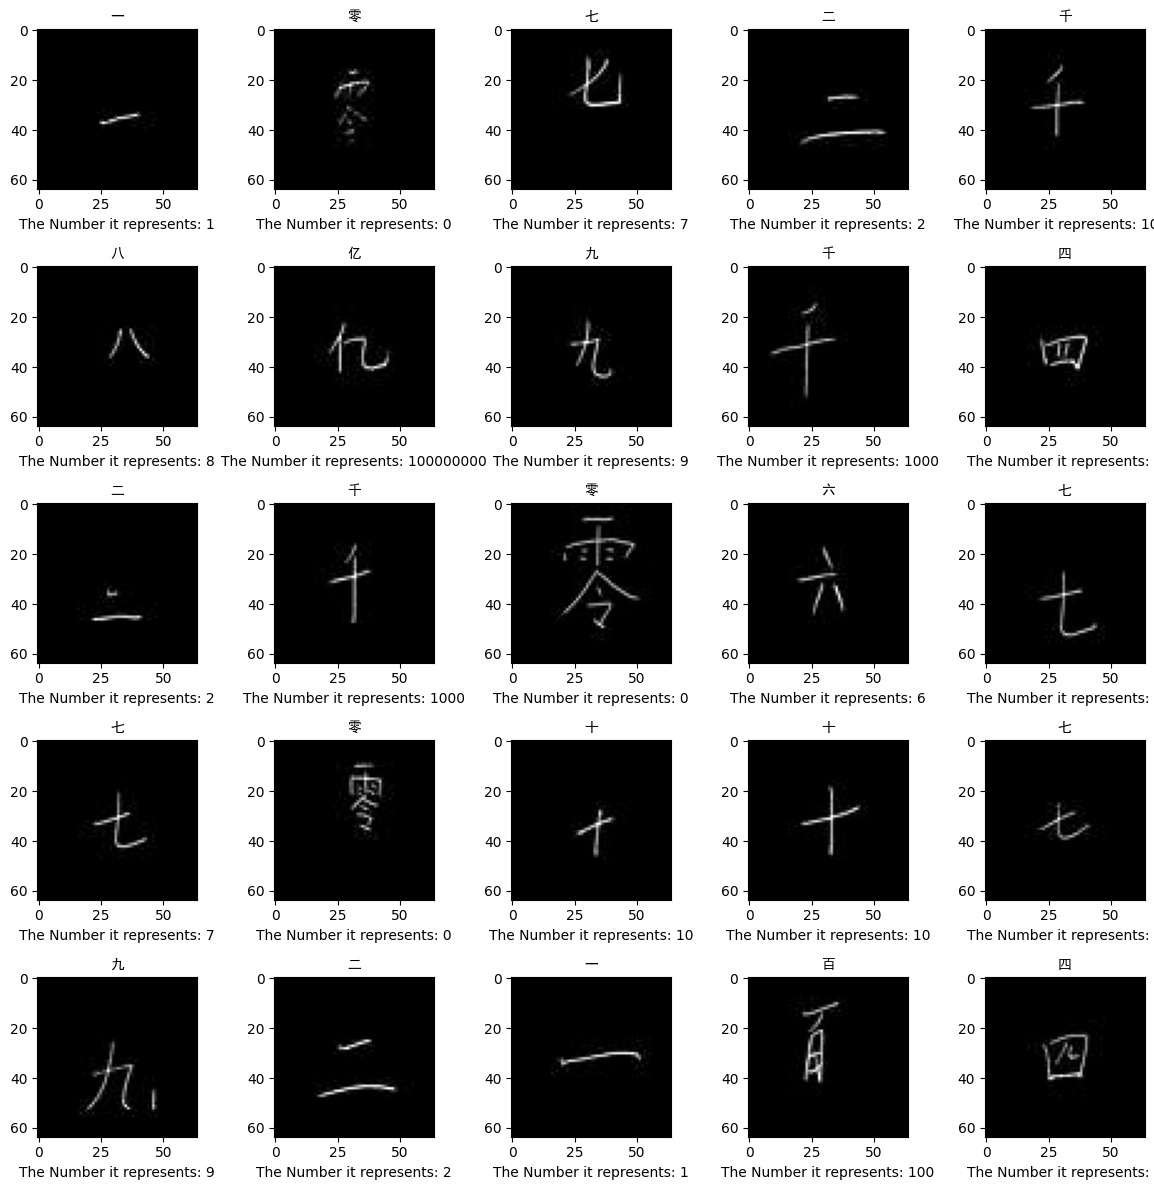

In [ ]:
#Visualize 25 random characters from the full dataset.
#Be sure that the plot shows both the English number and the Chinese number as shown below. (4)
fig, ax = plt.subplots(5,5, figsize=(12,12))
num = len(chinese)
for i in range(5):
  for j in range(5):
    rd = random.randint(0,num)
    pic = chinese.iloc[rd, :4096].astype(np.uint8)
    pic = np.array(pic)
    pic = pic.reshape(64,64)
    label = chinese.iloc[rd, 4096]
    character = chinese.iloc[rd, 4097]
    ax[i,j].imshow(pic, cmap='grey')
    ax[i,j].set_title(character, fontproperties=chinese_font)
    ax[i,j].set_xlabel('The Number it represents: ' + str(label))
fig.tight_layout()
plt.show()

In [ ]:
#Scale the pixel values (1)
x = chinese.drop(columns=['label', 'character'])
y = chinese['label']
y_label = chinese['character']
x = x/255

In [ ]:
y

,label
0,9
1,9
2,9
3,9
4,9
...,...
14995,8
14996,8
14997,8
14998,8


In [ ]:
#Partition the dataset into train and test sets. Print the shapes of the train and test data sets. (1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2024, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 4096)
(3000, 4096)
(12000,)
(3000,)


In [ ]:
#Build a model of the NN using keras layers. The type, number and hyperparameters of layers is up to you. (3)
#Display the model summary. (1)

model = Sequential()
model.add(Flatten(input_shape=(64,64,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       204,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         3,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           765 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,240 (832.97 KB)

 Trainable params: 213,240 (832.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Use the loss function sparse_categorical_crossentropy when compiling the model. (1)
my_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss ='sparse_categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

In [ ]:
#Train the model with at least 50 epochs. (1)
x_train = x_train.values.reshape(-1, 64, 64, 1)
x_test = x_test.values.reshape(-1, 64, 64, 1)
y_train_l = y_train.replace({100: 11, 1000: 12, 10000: 13, 100000000: 14})
y_test_l = y_test.replace({100: 11, 1000: 12, 10000: 13, 100000000: 14})
history = model.fit(x_train, y_train_l, validation_data=(x_test, y_test_l), epochs=50, verbose=2)

Epoch 1/50
375/375 - 5s - 12ms/step - accuracy: 0.1937 - loss: 2.4999 - val_accuracy: 0.3593 - val_loss: 1.9836
Epoch 2/50
375/375 - 4s - 12ms/step - accuracy: 0.4501 - loss: 1.6841 - val_accuracy: 0.5350 - val_loss: 1.3970
Epoch 3/50
375/375 - 3s - 9ms/step - accuracy: 0.6097 - loss: 1.1698 - val_accuracy: 0.6537 - val_loss: 1.0637
Epoch 4/50
375/375 - 5s - 12ms/step - accuracy: 0.7129 - loss: 0.8431 - val_accuracy: 0.7050 - val_loss: 0.8811
Epoch 5/50
375/375 - 3s - 7ms/step - accuracy: 0.7753 - loss: 0.6521 - val_accuracy: 0.7363 - val_loss: 0.8027
Epoch 6/50
375/375 - 3s - 9ms/step - accuracy: 0.8163 - loss: 0.5317 - val_accuracy: 0.7523 - val_loss: 0.7350
Epoch 7/50
375/375 - 5s - 12ms/step - accuracy: 0.8486 - loss: 0.4273 - val_accuracy: 0.7520 - val_loss: 0.7738
Epoch 8/50
375/375 - 3s - 7ms/step - accuracy: 0.8741 - loss: 0.3584 - val_accuracy: 0.7550 - val_loss: 0.7773
Epoch 9/50
375/375 - 5s - 14ms/step - accuracy: 0.8881 - loss: 0.3114 - val_accuracy: 0.7467 - val_loss: 0.8

Text(0.5, 1.0, 'Accuracy Curve')

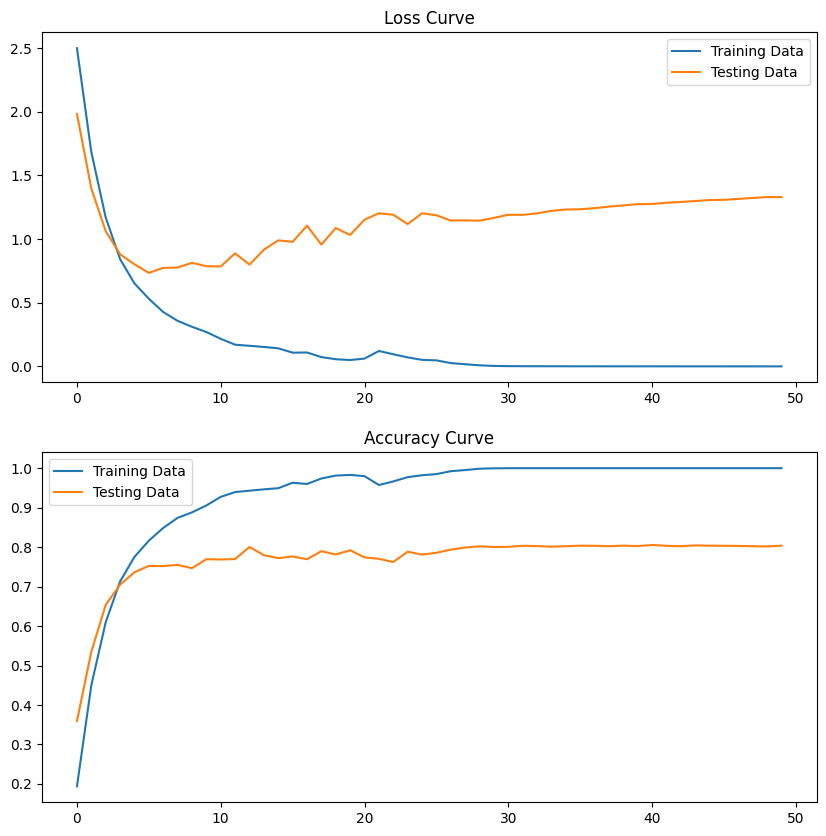

In [ ]:
# Plot the loss and accuracy curves for both train and test partitions. (2)
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], label='Training Data')
ax[0].plot(history.history['val_loss'], label='Testing Data')
ax[0].legend()
ax[0].set_title('Loss Curve')
ax[1].plot(history.history['accuracy'], label='Training Data')
ax[1].plot(history.history['val_accuracy'], label='Testing Data')
ax[1].legend()
ax[1].set_title('Accuracy Curve')

In [ ]:
#Print the confusion matrix. (1)
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
for i in range(len(y_pred_class)):
    if y_pred_class[i] == 11:
        y_pred_class[i] = 100
    elif y_pred_class[i] == 12:
        y_pred_class[i] = 1000
    elif y_pred_class[i] == 13:
        y_pred_class[i] = 10000
    elif y_pred_class[i] == 14:
        y_pred_class[i] = 100000000
print(y_pred_class)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[   6  100    9 ... 1000  100    4]


In [ ]:
y_test = y_test.to_numpy()
y_test

array([   7,  100,    9, ..., 1000,  100,    4])

In [ ]:
label = np.unique(y_test)
label

array([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,       100,
            1000,     10000, 100000000])

In [ ]:
np.unique(y_pred_class)

array([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,       100,
            1000,     10000, 100000000])

In [ ]:
cfm = confusion_matrix(y_test, y_pred_class, labels=label)
cfm

array([[175,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,  16,   1,
          7,   0],
       [  0, 193,   5,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   6, 172,  15,   1,   0,   2,   2,   0,   0,   1,   0,   1,
          0,   0],
       [  0,   0,  16, 170,   0,   4,   3,   3,   0,   0,   0,   0,   4,
          0,   0],
       [  3,   0,   0,   0, 167,   0,   2,   1,   2,   2,   0,   4,   3,
          3,  13],
       [  0,   0,   0,   4,   0, 164,   1,   5,   0,   5,   0,  16,   3,
          2,   0],
       [  0,   2,   4,   3,   4,   5, 143,   3,   2,  13,   2,   1,   4,
         10,   4],
       [  0,   0,   0,   0,   2,   8,  10, 158,   2,  12,   1,   2,   2,
          2,   1],
       [  0,   0,   0,   1,   3,   0,   2,   2, 175,   8,   0,   1,   0,
          2,   6],
       [  2,   0,   0,   0,   4,   9,   4,   9,   1, 147,   0,   4,   0,
         11,   9],
       [  1,   1,   0,   0,   0,   0,   2,   1,   1,   0, 169,   0,  23,
       

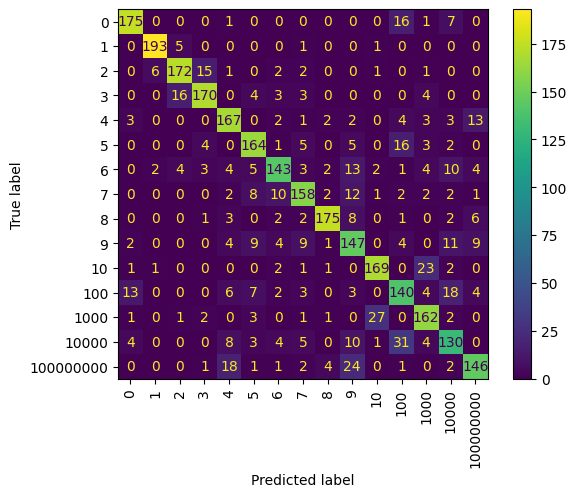

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=label)
cm.plot(xticks_rotation='vertical')


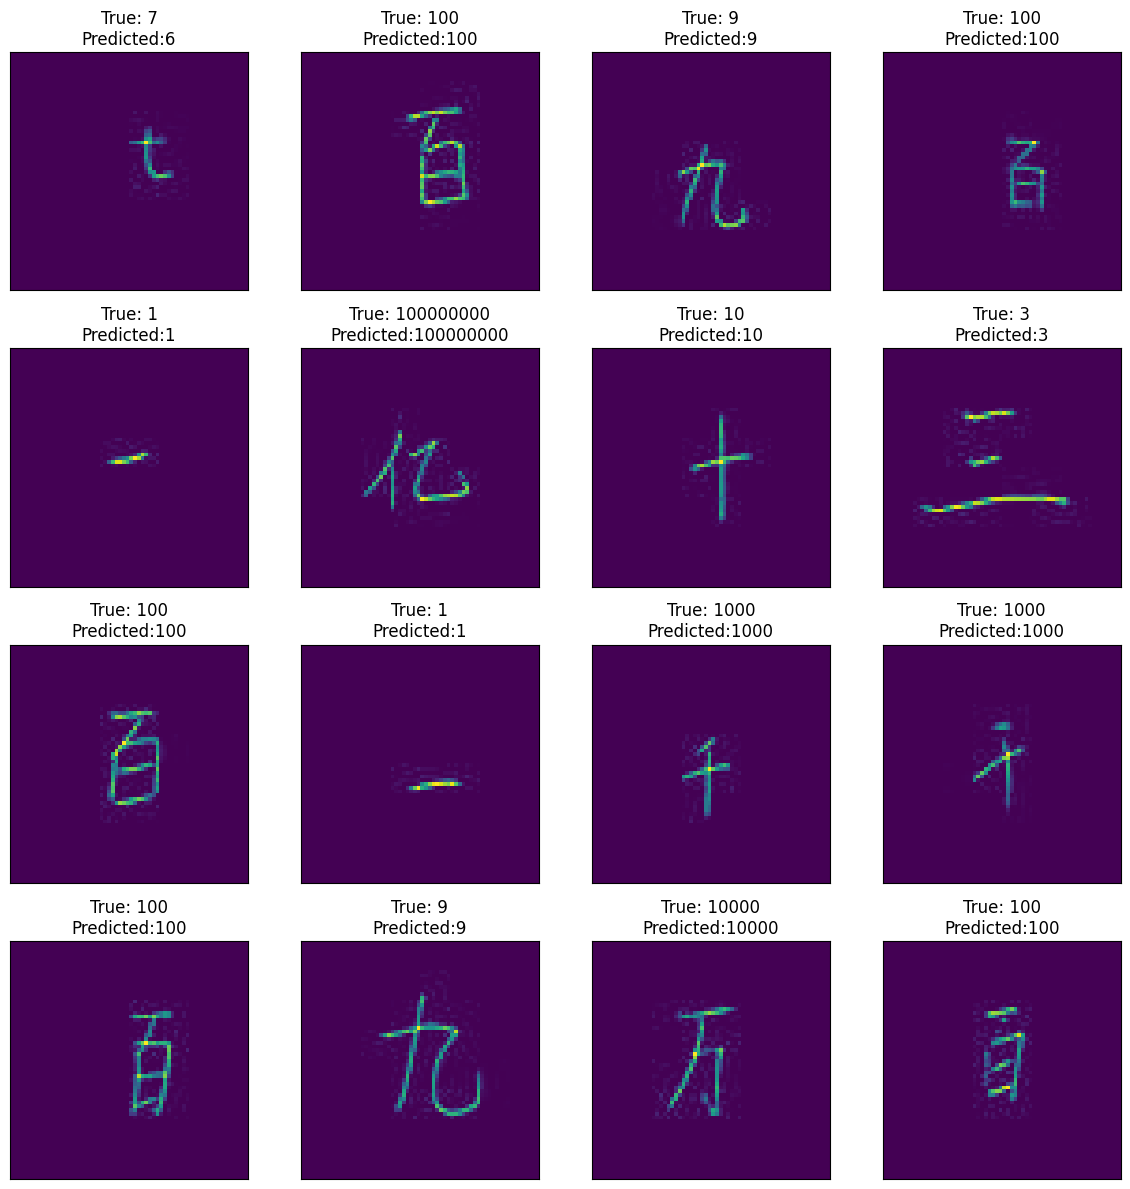

In [ ]:
#Visualize the predicted and actual image labels for the first 16 images in the test dataset. (4)
plt.figure(figsize=(12,12))
for i in range(16):
  ax = plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.tight_layout()
  ax.imshow(x_test[i])
  ax.set_title('True: ' + str(y_test[i]) + '\n' + 'Predicted:' + str(y_pred_class[i]))
plt.show()

In [ ]:
#Visualize 1 random misclassified image from the test dataset.
# Display both the predicted and actual image labels. Also display the Chinese character as the X Labedl. (4)
misclassified = []
for i in range(len(y_test)):
  if y_test[i] != y_pred_class[i]:
    misclassified.append(i)
randpic = random.choice(misclassified)
randpic

1279

Text(0.5, 1.0, 'True: 7\nPredicted: 4')

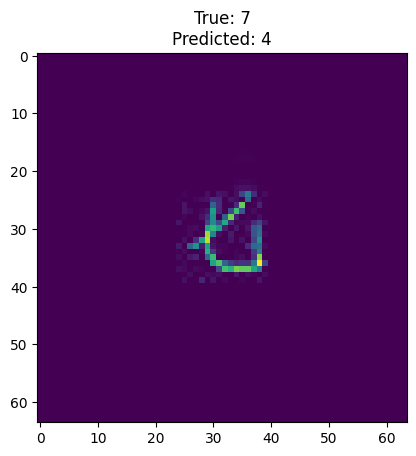

In [ ]:
plt.imshow(x_test[randpic])
plt.title('True: ' + str(y_test[randpic]) + '\n' + 'Predicted: ' + str(y_pred_class[i]))